<h1><center>Segmentacion de imagenes: Metodo de conjunto de nivel</center></h1>
<center><strong>Análisis Numérico de Ecuaciones en Derivadas Parciales:Teoría y Laboratorio</strong></center>
<center>Autores: Felipe Urrutia, Daniel Minaya, Sebastian Toloza</center>
<center>Tutor: Axel Osses A., Auxiliar: Emir N. Chacra</center>

# Resultados avanzados

Estudio del conjunto de datos PASCAL 2012 para la segmentacion de imagenes

In [2]:
from class_levelsetmethod import LevelSetMethod, Image, np, plt, animation, os

In [3]:
arr = os.listdir("dataset/database_pascal")
print(arr)

['2007_004052.jpg', '2007_004052.png', '2008_002710.jpg', '2008_002710.png', '2008_004621.jpg', '2008_004621.png', '2009_004186.jpg', '2009_004200.jpg', '2009_004366.jpg', '2009_004368.jpg', '2009_005078.jpg', '2009_005078.png', '2010_000099.jpg', '2010_001061.jpg', '2010_001061.png', '2011_002222.jpg', '2011_002222.png']


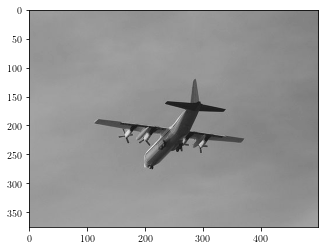

In [4]:
id_name = "2011_002222"
img_o = Image.open(f"dataset/database_pascal/{id_name}.jpg").convert("L")

dim = (img_o.size[1], img_o.size[0])
img = np.array(img_o.getdata()).reshape((dim[0], dim[1]))

plt.imshow(img, cmap="gray")

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [376 500]
|img_min/max: (3, 255)
|new_img_min/max(resize): (1.5598146472407962e-08, 8.410150642306175e-08)
|new_dim:     [ 75 100]
|new_img_min/max(norm): (0, 254)
|size_domain: 7500
</set_image>
Wall time: 42.3 ms


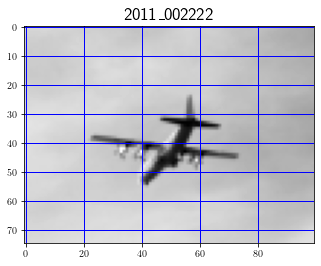

In [5]:
%%time
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    img, 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)

Wall time: 2.68 s


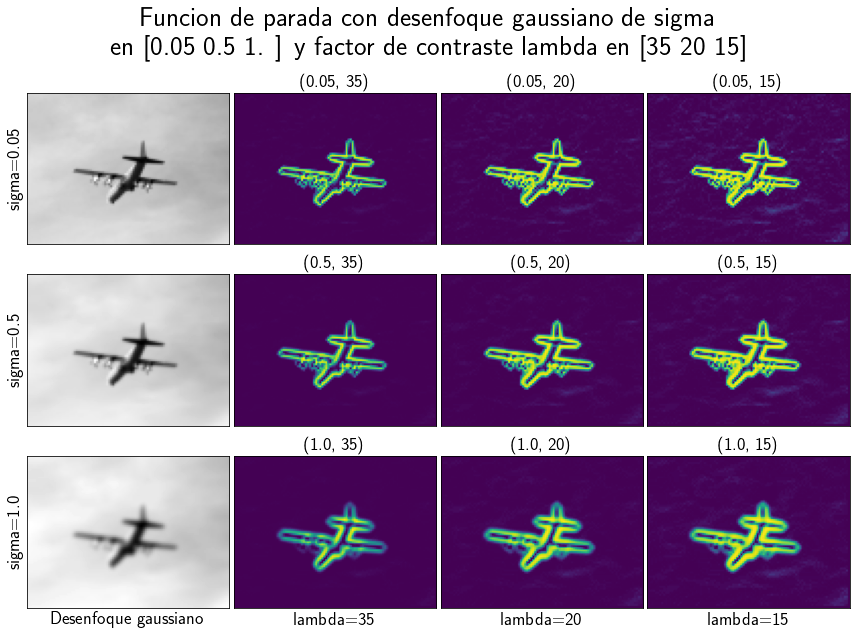

In [6]:
%%time
segmentator.eval_stopfunct(
    list_sgm=np.array([0.05, 0.5, 1]), 
    list_lmbd=np.array([35, 20, 15]),
    cmap="viridis_r"
)

In [225]:
%%time
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=20,
)

<set_stopfunct> sigma: 0.05, lambda: 20
|gauss_min/max: (0, 254)
|stopfunct_min/max:     (0.009154574998855679, 1.0)
</set_stopfunct>
Wall time: 2 ms


Wall time: 161 ms


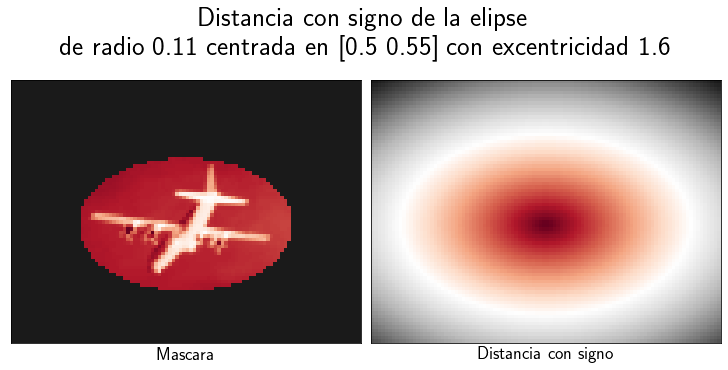

In [233]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.55]), 
    r=0.11,
    e=1.6
)

In [234]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.55]), 
    r=0.11,
    e=1.6
)

<set_sgndist> centro: [0.5  0.55], radio: 0.11, excentricidad: 1.6
</set_sgndist>
Wall time: 2 ms


Wall time: 80.8 ms


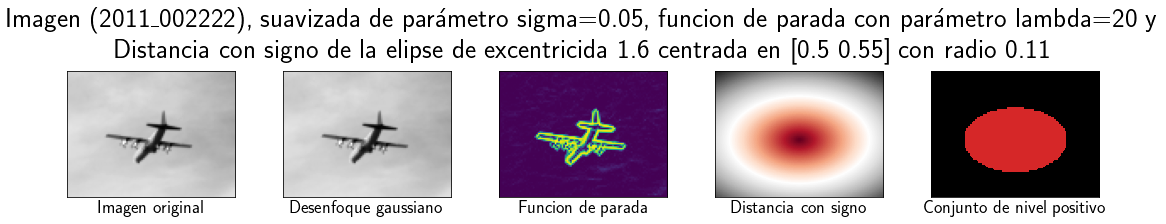

In [235]:
%%time 
segmentator.show_setting(cmap_stopfunct="viridis_r")

In [236]:
%%time 
segmentator.print_setting()

<print_setting>
|sigma: 0.05
|lambda: 20
|centro: [0.5  0.55]
|radio: 0.11
|excentricidad: 1.6
</print_setting>
Wall time: 0 ns


In [237]:
%%time
segmentator.solve(
    n_iter = 50,
    tau = 0.25,
    k = -2,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 50, discretizacion en tiempo: 0.25, constante k: -2
|path_save_file: results/2011_002222__iterations_times__sgm_0_05__lmbd_20__tau_0_25__k_-2
|Iter: 1, T iter: 2.6s, T trans:  5.1s, T per iter: 2.5s p/m  0.0s, T rest:  127.4s p/m  0.0s
|Iter: 6, T iter: 2.3s, T trans:  17.4s, T per iter: 2.5s p/m  0.1s, T rest:  111.9s p/m  0.9s
|Iter: 11, T iter: 2.3s, T trans:  29.0s, T per iter: 2.4s p/m  0.1s, T rest:  96.8s p/m  0.8s
|Iter: 16, T iter: 2.3s, T trans:  40.7s, T per iter: 2.4s p/m  0.1s, T rest:  83.7s p/m  0.7s
|Iter: 21, T iter: 2.3s, T trans:  52.3s, T per iter: 2.4s p/m  0.1s, T rest:  71.3s p/m  0.6s
|Iter: 26, T iter: 2.5s, T trans:  64.6s, T per iter: 2.4s p/m  0.1s, T rest:  59.9s p/m  0.5s
|Iter: 31, T iter: 2.3s, T trans:  76.5s, T per iter: 2.4s p/m  0.1s, T rest:  47.8s p/m  0.5s
|Iter: 36, T iter: 2.3s, T trans:  88.1s, T per iter: 2.4s p/m  0.1s, T rest:  35.7s p/m  0.4s
|Iter: 41, T iter: 2.4s, T trans:  99.7s, T per iter: 2.4s p/m  0.1s, T res

Wall time: 137 ms


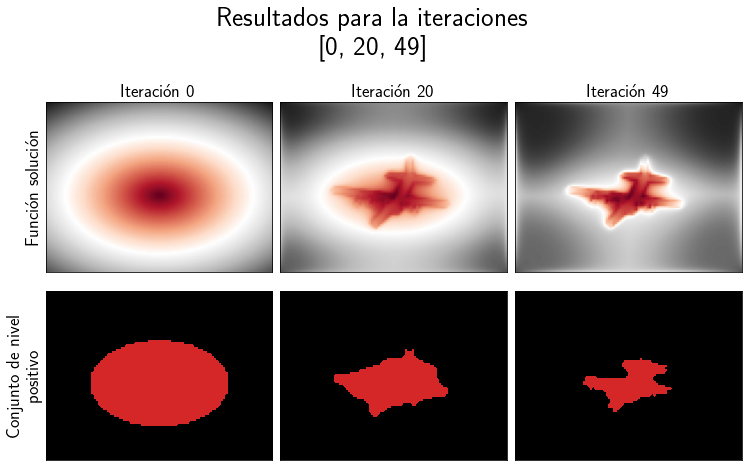

In [239]:
%%time
segmentator.show_solution(
    show_iters=[0, 20, 49]
)

In [240]:
def get_groud_truth(id_name):
    img_r = Image.open(f"dataset/database_pascal/{id_name}.png").convert("L")

    dim_r = (img_r.size[1], img_r.size[0])

    if dim_r[0]>100:
        basewidth = 100
        wpercent = (basewidth/float(img_r.size[0]))
        hsize = int((float(img_r.size[1])*float(wpercent)))
        img_r = img_r.resize((basewidth,hsize), Image.ANTIALIAS)


    dim_r = (img_r.size[1], img_r.size[0])

    img_r = ImageOps.posterize(img_r, 4)
    img_r = np.array(img_r.getdata()).reshape((dim_r[0], dim_r[1]))
    img_r = (255*(img_r-np.min(img_r))/(np.max(img_r)-np.min(img_r))).astype(int)

    img_r = ((img_r>np.mean(img_r))).astype(int)
    return img_r

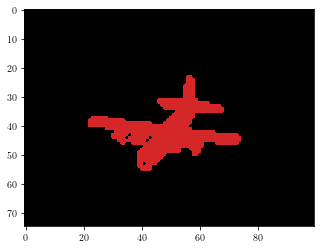

In [241]:
img_r = get_groud_truth(segmentator.id_name)
plt.imshow(img_r, cmap=ListedColormap(['black','tab:red']));

In [242]:
def precision_recall(y_real, y_pred, pos_label=1):
    tp = np.sum( (y_real==y_pred) & (y_pred==pos_label) )
    p = np.sum( y_real==pos_label )
    recall = tp/p
    
    fn = np.sum( (y_real!=y_pred) & (y_pred==pos_label) )
    precision = tp/(tp+fn)
    
    return precision, recall

In [245]:
def plot_precision_recall(img_r, iterations):
    clf = [(un>0).astype(int) for un in iterations]
    precision_recall_curve = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf]
    precision = np.array([prc_k[0] for prc_k in precision_recall_curve])
    recall = np.array([prc_k[1] for prc_k in precision_recall_curve])
    best_iter= np.argmax((2*precision*recall)/(precision+recall))
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(precision, recall, c=range(len(precision_recall_curve)), cmap="plasma")
    ax.scatter([precision[best_iter]], [recall[best_iter]], c="red", s=50, label=f"Iter: {best_iter}\nRecall: {100*recall[best_iter]: .1f}\%\nPrecision: {100*precision[best_iter]: .1f}\%")
    ax.set_yticks(np.linspace(3/4, 1, 5).round(2));
    ax.set_xticks(np.linspace(3/4, 1, 5).round(2));
    plt_eps = 0.01
    plt.xticks(fontsize=18*0.8)
    plt.yticks(fontsize=18*0.8)
    ax.set_xlim([3/4-plt_eps, 1+plt_eps])
    ax.set_ylim([3/4-plt_eps, 1+plt_eps])
    ax.set_ylabel("Recall", fontsize=18)
    ax.set_xlabel("Precision", fontsize=18)
    plt.grid()
    ax.legend(fontsize=18*0.8)
    ax.set_title("Precision vs Recall", fontsize=18*1.5);
    plt.gca().set_aspect('equal')

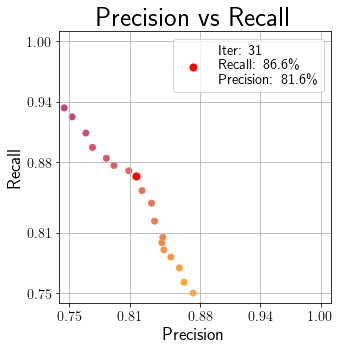

In [246]:
plot_precision_recall(img_r, segmentator.iterations)

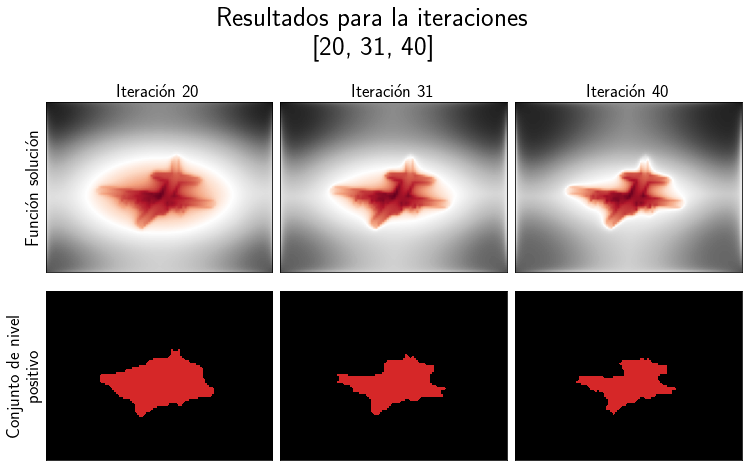

In [249]:
segmentator.show_solution(
    show_iters=[20, 31, 40]
)